# Linear Regression PyTorch with One Sample
- **Task**: Regression
- **Data**: Sample Dataset
- **Model**: Linear Regression
- **Loss function**: Mean Square Error
- **Optimization**: Stochastic Gradient Descent

## 1. Import Library

In [55]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.autograd import Variable

## 2. Data

### 2.1. Sample Dataset

In [56]:
# Data sample
x = Variable(torch.Tensor([[1.0], [2.0], [3.0]]))
y = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))

### 2.2. Data Information

In [57]:
print(f"Number of sample: {len(x)}")

Number of sample: 3


In [58]:
print(f"Datatype of sample: {x.type()}")
print(f"Size of sample: {x.size()}")

Datatype of sample: torch.FloatTensor
Size of sample: torch.Size([3, 1])


### 2.3. Data Visualization

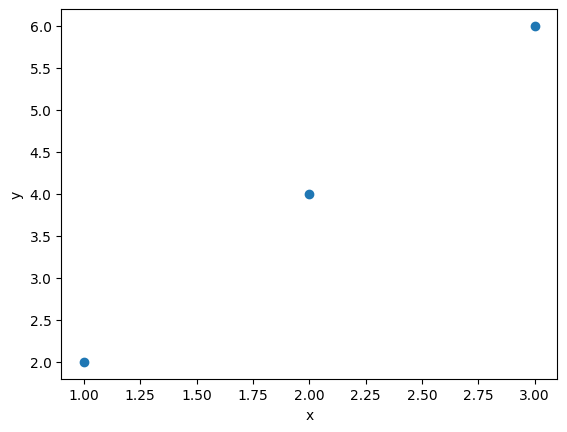

In [59]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 3. Model

In [60]:
class LinearRegressionModel(torch.nn.Module):

    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [61]:
model = LinearRegressionModel()

## 4. Loss Function and Optimization

In [62]:
LR = 0.01
EPOCHS = 500

In [63]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

## 5. Train

In [64]:
for epoch in range(EPOCHS):

    # Forward pass: Compute predicted y by passing
    # x to the model
    output = model(x)

    # Compute and print loss
    loss = criterion(output, y)

    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'[{epoch}/{EPOCHS}] Epoch, Loss {loss.item():.4f}')

[0/500] Epoch, Loss 45.9982
[1/500] Epoch, Loss 20.4799
[2/500] Epoch, Loss 9.1198
[3/500] Epoch, Loss 4.0626
[4/500] Epoch, Loss 1.8113
[5/500] Epoch, Loss 0.8090
[6/500] Epoch, Loss 0.3627
[7/500] Epoch, Loss 0.1641
[8/500] Epoch, Loss 0.0756
[9/500] Epoch, Loss 0.0362
[10/500] Epoch, Loss 0.0186
[11/500] Epoch, Loss 0.0107
[12/500] Epoch, Loss 0.0072
[13/500] Epoch, Loss 0.0056
[14/500] Epoch, Loss 0.0048
[15/500] Epoch, Loss 0.0044
[16/500] Epoch, Loss 0.0042
[17/500] Epoch, Loss 0.0041
[18/500] Epoch, Loss 0.0040
[19/500] Epoch, Loss 0.0040
[20/500] Epoch, Loss 0.0039
[21/500] Epoch, Loss 0.0038
[22/500] Epoch, Loss 0.0038
[23/500] Epoch, Loss 0.0037
[24/500] Epoch, Loss 0.0037
[25/500] Epoch, Loss 0.0036
[26/500] Epoch, Loss 0.0036
[27/500] Epoch, Loss 0.0035
[28/500] Epoch, Loss 0.0035
[29/500] Epoch, Loss 0.0034
[30/500] Epoch, Loss 0.0034
[31/500] Epoch, Loss 0.0033
[32/500] Epoch, Loss 0.0033
[33/500] Epoch, Loss 0.0032
[34/500] Epoch, Loss 0.0032
[35/500] Epoch, Loss 0.0031


## 6. Inference

### 6.1. Test

In [65]:
sample = Variable(torch.Tensor([[4.0]]))
print(f"Predict (after training),  x = 4 -> output = {model(sample).item()}")

Predict (after training),  x = 4 -> output = 7.99776029586792


### 6.2. Visualization

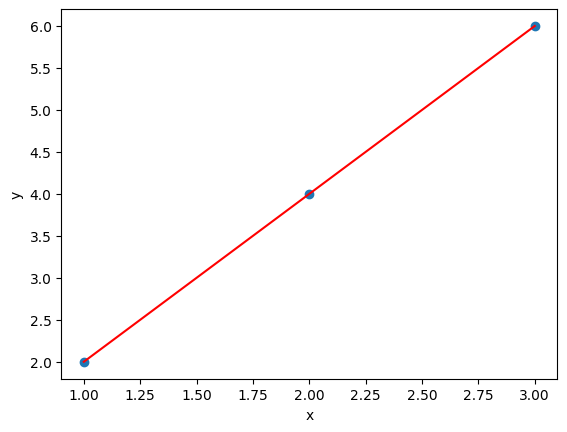

In [66]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
output = model(x)
plt.plot(x.detach().numpy(), output.detach().numpy(), 'r')
plt.show()